In the following analysis we used the public dataset:

Pollen, Alex A., et al. "Molecular identity of human outer radial glia during cortical development." Cell 163.1 (2015): 55-67.
http://dx.doi.org/10.1016/j.cell.2015.09.004

Processed data was downloaded from supplementary infromation, tables S1 and S2 (files mmc2.xls and mmc3.xls respectively).

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
from scipy.stats.stats import pearsonr 
from scipy import stats
import scikits.bootstrap as boot

cmap = plt.cm.get_cmap('Blues')

%matplotlib inline
sns.set_style('white')
sns.set_context('notebook', font_scale=1.7, rc={'lines.linewidth': 1.3})

path_dropbox = '/Users/marcelob/Dropbox/'

# calculates the correlation between two genes
def pcorr(x,y, log_scale=False):
    if log_scale:
        x = np.log2(x)
        y = np.log2(y)
    [corr,p] = pearsonr(x, y)
    a,b   = np.polyfit(x, y, 1) 
    return [corr, p, a, b]

# calculate the expression of a list of genes defined in list_genes in the log2(X+1) scale        
def get_expression(D, list_genes):
    D = 2**D - 1.0
    out = np.sum( [D.loc[list_genes[i]].values for i in range(len(list_genes))], axis=0)
    return np.log2(np.array(out) + 1.0) 

In [2]:
D = {}
D['info']  = pd.read_excel(path_dropbox+'data/Pollen2015/mmc2.xlsx', index_col=None, header=0)
D['data']  = pd.read_excel(path_dropbox+'data/Pollen2015/mmc3.xlsx', index_col=0,    header=0)
D['info'].index = D['info']['Cell'].values
D['info'] = D['info'].T
D['class'] = pd.DataFrame([i[0] for i in D['data'].columns], index=D['data'].columns, columns=['__class']).T
D['data'].head()

,O9-A6,O9-B5,O9-B8,O9-D2,O9-E2,O9-F4,O9-F5,O9-G9,O10-A4,O10-D1,...,O9-G12,O10-G4,O8-H1,S37-B4,S37-F12,S38-H11,Hi_GW16_10,Hi_GW16_26,Hi_GW16_7,Hi_GW16_9
DDX11L1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
WASH7P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.09624,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.620579,0.0,0.0,0.0
MIR1302-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
FAM138A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
OR4F5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [3]:
D['info'].head()

,O10-A1,O10-A11,O10-A12,O10-A3,O10-A4,O10-A5,O10-A7,O10-A8,O10-A9,O10-B1,...,Hi_GW16_24,Hi_GW16_25,Hi_GW16_26,Hi_GW16_3,Hi_GW16_4,Hi_GW16_5,Hi_GW16_6,Hi_GW16_7,Hi_GW16_8,Hi_GW16_9
Cell,O10-A1,O10-A11,O10-A12,O10-A3,O10-A4,O10-A5,O10-A7,O10-A8,O10-A9,O10-B1,...,Hi_GW16_24,Hi_GW16_25,Hi_GW16_26,Hi_GW16_3,Hi_GW16_4,Hi_GW16_5,Hi_GW16_6,Hi_GW16_7,Hi_GW16_8,Hi_GW16_9
Anatomical Source,SVZ,SVZ,SVZ,SVZ,SVZ,SVZ,SVZ,SVZ,SVZ,SVZ,...,VZ,VZ,VZ,SVZ,SVZ,SVZ,SVZ,SVZ,SVZ,SVZ
Age,GW16.5,GW16.5,GW16.5,GW16.5,GW16.5,GW16.5,GW16.5,GW16.5,GW16.5,GW16.5,...,GW16,GW16,GW16,GW16,GW16,GW16,GW16,GW16,GW16,GW16
"LibrarySize (Read Pairs, Million)",2.106,2.81494,2.97857,2.07449,1.91691,2.43096,2.85678,2.9554,2.49103,2.35668,...,7.15369,8.03316,10.4257,10.1684,8.51763,10.3586,6.19076,7.33805,7.93595,9.5622
MappedPairs,0.854531,1.32159,1.35072,0.554413,0.94399,0.831268,1.01963,1.10254,0.945783,1.33814,...,2.57236,2.03606,2.03835,5.4746,1.94727,2.49483,1.30793,1.32857,3.59705,1.57776


Using cells only from the VZ. Num cells =  179


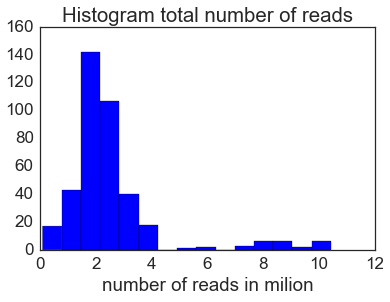

In [4]:
# --------- checking the distribuition of the total number of reads of the cells. --------------
plt.hist(D['info'].loc['LibrarySize (Read Pairs, Million)'], bins=15)
plt.xlabel('number of reads in milion')
plt.title('Histogram total number of reads')

# -- only cells from the Ventricular Zone (VZ) and with more than 1million reads are selected --
t_minreads = D['info'].loc['LibrarySize (Read Pairs, Million)'].values>1
t_vz       = D['info'].loc['Anatomical Source']=='VZ'  
t_svz      = D['info'].loc['Anatomical Source']=='SVZ'
D['VZ']  = D['info'].columns[t_vz  & t_minreads]
D['SVZ'] = D['info'].columns[t_svz & t_minreads]

print 'Using cells only from the VZ. Num cells = ', len(D['info'].loc['Cell'][D['VZ']])
D['data']  = D['data'][D['VZ']]
D['class'] = D['class'][D['VZ']]

# Using log2 scale, and adding 1.0 to avoid -inf
D['data']  = np.log2(D['data']+1.0)

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


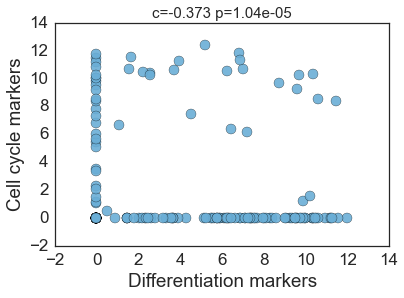

In [5]:
y = get_expression(D['data'], ['MKI67','CCND1', 'MCM2'])
x = get_expression(D['data'], ['ASCL1', 'NEUROG2', 'NEUROD2', 'NEUROD6'])
plt.title('c=' +str(round(pcorr(x[(x+y)>0],y[(x+y)>0])[0],3))+
          ' p='+str(round(pcorr(x[(x+y)>0],y[(x+y)>0])[1],7)), size=15)
plt.scatter(x, y, cmap=cmap, c=cmap(0.5), marker='o', s=100, alpha=0.9)
#plt.title(pcorr(x[(x+y)>0],y[(x+y)>0])[:2], size=15)
plt.xlabel('Differentiation markers')
plt.ylabel('Cell cycle markers')
#plt.savefig('Embryo_human_DiffxCCmarkers.pdf', format='pdf')
plt.show()

In [6]:
def resample(X, n=None):
    if n==None:
        n = np.shape(X)[1]
    resample_i = np.floor(np.random.rand(n)*np.shape(X)[1]).astype(int)
    X_resample = X[:,resample_i]
    return X_resample

X = np.zeros((2,len(x)))
X[0,:] = x
X[1,:] = y

X = X[:,np.mean(X,0)>0.0]

-0.427942579296 5.27454916451


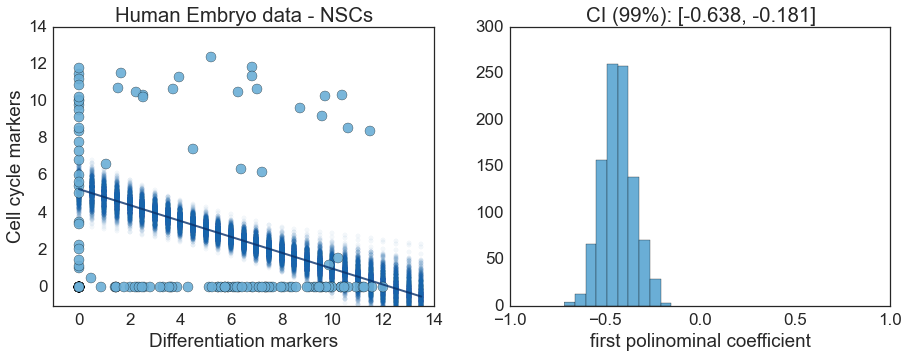

In [7]:
f = plt.subplots(1, 2, figsize=(15, 5))
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)

xr = np.arange(0, 14, 0.5)
n_sampling = 1000
p = np.zeros((2, n_sampling))
for i in range(n_sampling):
    Xs = resample(X)
    p[:,i] = np.polyfit(Xs[0],Xs[1],1)
    plt.scatter(xr, p[0,i]*xr + p[1,i], color=cmap(0.8), alpha=0.05)

    
A, B = np.polyfit(X[0], X[1], 1)
plt.scatter(x, y, cmap=cmap, c=cmap(0.5), marker='o', s=100, alpha=0.9)
plt.plot(xr, A*xr + B, color=cmap(1.), alpha=0.8, lw=2)
plt.xlim([-1, 14])
plt.ylim([-1, 14])
plt.xlabel('Differentiation markers')
plt.ylabel('Cell cycle markers')
plt.title('Human Embryo data - NSCs')

ax = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)
plt.hist(p[0,:], facecolor=cmap(0.5))
plt.xlim(-1, 1)
plt.xlabel('first polinominal coefficient')
ci = boot.ci( (X[0,:],X[1,:]), statfunction=stats.linregress, alpha=0.01)
plt.title('CI (99%): ['+str(np.round(ci[0,0],3))+', '+str(np.round(ci[1,0],3))+']')
# plt.savefig('Embryo_human_linearFit.pdf', format='pdf')
print A, B

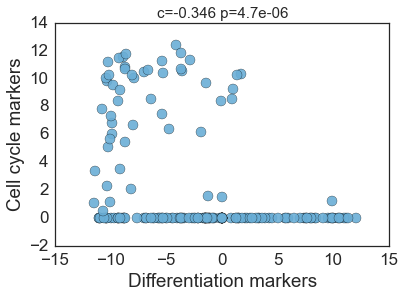

In [8]:
y = get_expression(D['data'], ['MKI67','CCND1', 'MCM2']) 
x = get_expression(D['data'], ['ASCL1', 'NEUROG2', 'NEUROD2', 'NEUROD6']) - get_expression(D['data'], ['SOX2','PAX6'])
plt.title('c=' +str(round(pcorr(x[np.abs(x+y)>0],y[np.abs(x+y)>0])[0],3))+
          ' p='+str(round(pcorr(x[np.abs(x+y)>0],y[np.abs(x+y)>0])[1],7)), size=15)
plt.scatter(x, y, cmap=cmap, c=cmap(0.5), marker='o', s=100, alpha=0.9)
#plt.title(pcorr(x[(x+y)>0],y[(x+y)>0])[:2], size=15)
plt.xlabel('Differentiation markers')
plt.ylabel('Cell cycle markers')
#plt.savefig('Embryo_human_DiffxCCmarkers.pdf', format='pdf')
plt.show()

-0.214728066227 1.85643748815


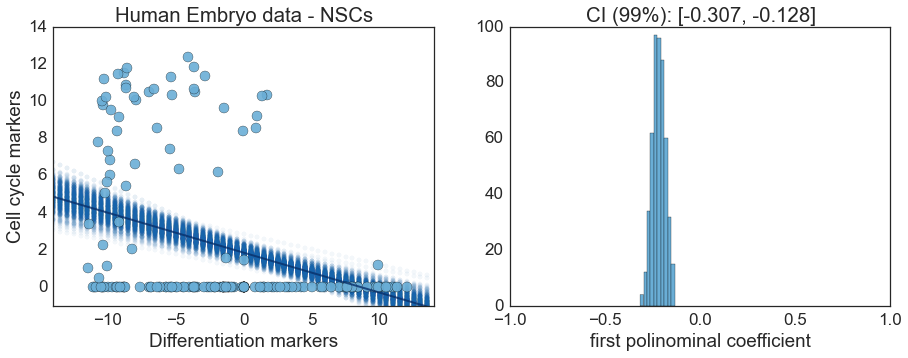

In [9]:
X = np.zeros((2, len(x)))
X[0,:] = x
X[1,:] = y
X = X[:,np.abs(np.mean(X,0))>0.0]

f = plt.subplots(1, 2, figsize=(15, 5))
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)

xr = np.arange(-14, 14, 0.5)
n_sampling = 500
p = np.zeros((2, n_sampling))
for i in range(n_sampling):
    Xs = resample(X)
    p[:,i] = np.polyfit(Xs[0],Xs[1],1)
    plt.scatter(xr, p[0,i]*xr + p[1,i], color=cmap(0.8), alpha=0.05)

    
A, B = np.polyfit(X[0], X[1], 1)
plt.scatter(x, y, cmap=cmap, c=cmap(0.5), marker='o', s=100, alpha=0.9)
plt.plot(xr, A*xr + B, color=cmap(1.), alpha=0.8, lw=2)
plt.xlim([-14, 14])
plt.ylim([-1, 14])
plt.xlabel('Differentiation markers')
plt.ylabel('Cell cycle markers')
plt.title('Human Embryo data - NSCs')

ax = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)
plt.hist(p[0,:], facecolor=cmap(0.5))
plt.xlim(-1, 1)
plt.xlabel('first polinominal coefficient')
ci = boot.ci( (X[0,:],X[1,:]), statfunction=stats.linregress, alpha=0.01)
plt.title('CI (99%): ['+str(np.round(ci[0,0],3))+', '+str(np.round(ci[1,0],3))+']')
plt.savefig('Embryo_human_linearFit_2.pdf', format='pdf')
print A, B